<a href="https://colab.research.google.com/github/ShrinkhalaSingh123/NetflixSubscriptionPlanPredictiveAnalysis/blob/main/NetflixSubscriptionPlan_Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Data Processing

In [4]:
import pandas as pd

# Load the dataset
file_path = '/mnt/data/Netflix Userbase.csv'
df = pd.read_csv('/content/Netflix Userbase.csv')

# Display the first few rows of the dataset
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


1.1 Convert Date Columns

In [3]:
# Convert date columns to datetime format
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d-%m-%y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%d-%m-%y')

# Display the updated dataframe
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month


1.2 Handle Missing Values

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

1.3 Encode Categorial Values

In [6]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Subscription Type', 'Country', 'Gender', 'Device', 'Plan Duration'])

# Display the encoded dataframe
df_encoded.head()


,User ID,Monthly Revenue,Join Date,Last Payment Date,Age,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Country_Australia,Country_Brazil,...,Country_Spain,Country_United Kingdom,Country_United States,Gender_Female,Gender_Male,Device_Laptop,Device_Smart TV,Device_Smartphone,Device_Tablet,Plan Duration_1 Month
0,1,10,15-01-22,10-06-23,28,True,False,False,False,False,...,False,False,True,False,True,False,False,True,False,True
1,2,15,05-09-21,22-06-23,35,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,True
2,3,12,28-02-23,27-06-23,42,False,False,True,False,False,...,False,True,False,False,True,False,True,False,False,True
3,4,12,10-07-22,26-06-23,51,False,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
4,5,10,01-05-23,28-06-23,33,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True


1.4  Split the Data into Training and Testing Sets

In [7]:
from sklearn.model_selection import train_test_split

# Create features and target variable
X = df_encoded.drop(['User ID', 'Join Date', 'Last Payment Date', 'Monthly Revenue'], axis=1)
y = df_encoded['Monthly Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2000, 21), (500, 21), (2000,), (500,))

Step  2:  Model Building

2.1 Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_lr, r2_lr


(2.818914580698956, -0.020548651379196592)

2.2 Random Forest Regressor

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf


(3.4129631331508565, -0.235615632553287)

2.3 Gradient Boosting Regressor

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

mse_gb, r2_gb


(2.8715184126768705, -0.03959313401446929)

Visualizations

In [ ]:
 1. Distribution of Subscription Types

<ipython-input-12-6b77f0aa69ad>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Subscription Type', palette='viridis')


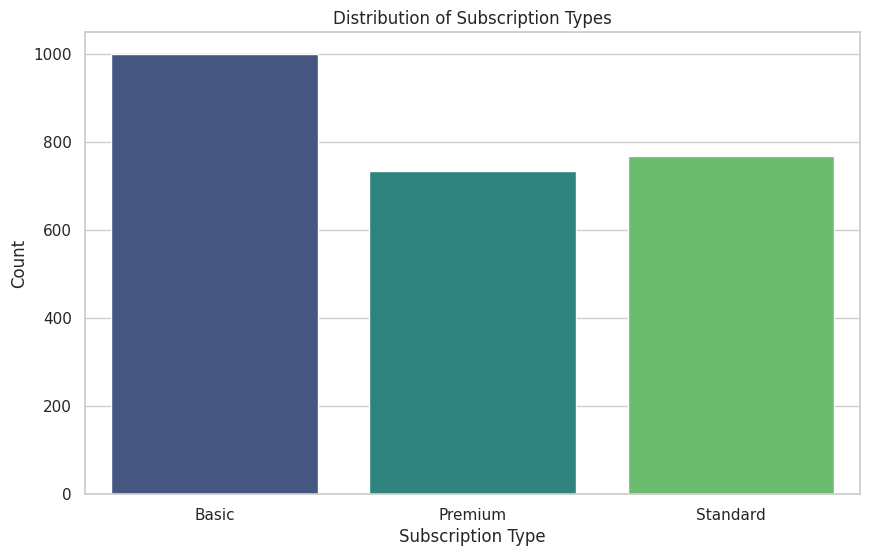

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the distribution of Subscription Types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Subscription Type', palette='viridis')
plt.title('Distribution of Subscription Types')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.show()


2. Monthly Revenue Distribution

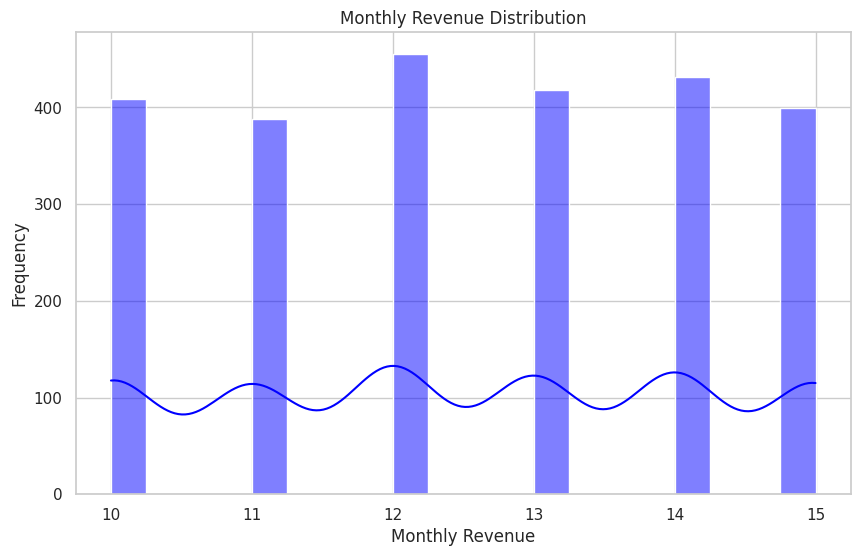

In [13]:
# Plot the distribution of Monthly Revenue
plt.figure(figsize=(10, 6))
sns.histplot(df['Monthly Revenue'], bins=20, kde=True, color='blue')
plt.title('Monthly Revenue Distribution')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()


3. Age Distribution by Subscription Type

<ipython-input-14-9fc9064b36b6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Subscription Type', y='Age', palette='viridis')


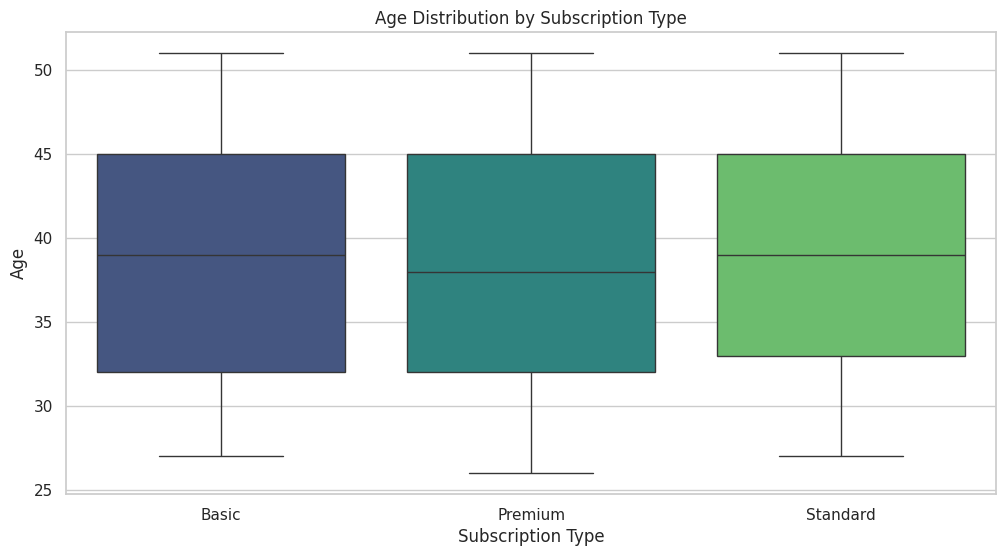

In [14]:
# Plot Age Distribution by Subscription Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Subscription Type', y='Age', palette='viridis')
plt.title('Age Distribution by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Age')
plt.show()


4. Country-wise Subscription Distribution


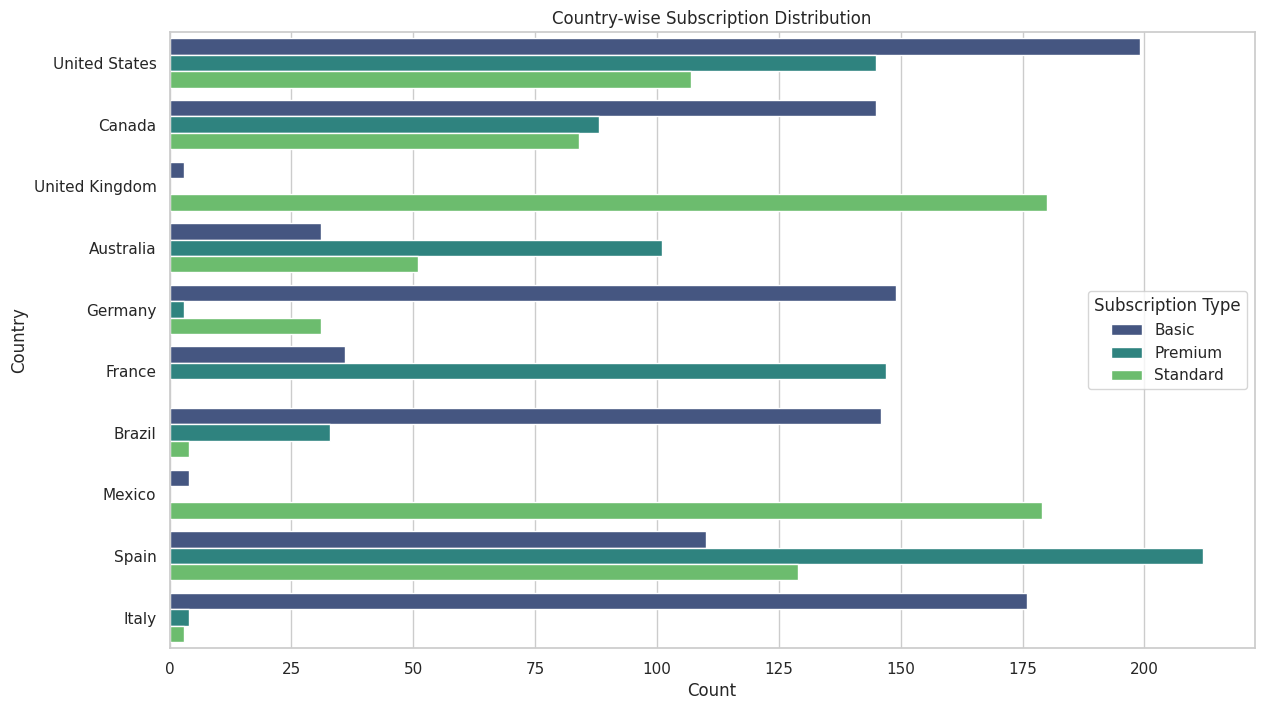

In [15]:
# Plot Country-wise Subscription Distribution
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='Country', hue='Subscription Type', palette='viridis')
plt.title('Country-wise Subscription Distribution')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


5. Gender-wise Device Usage

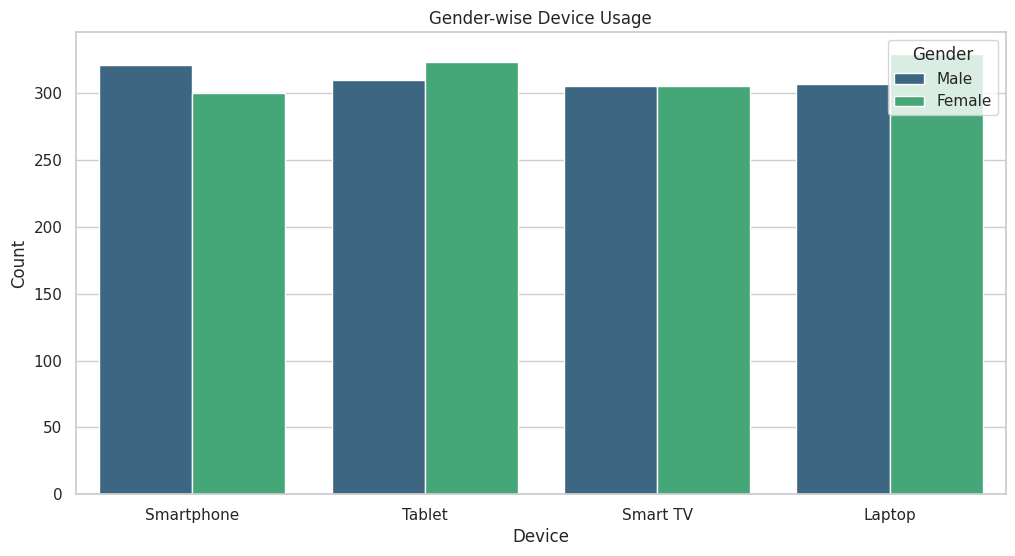

In [16]:
# Plot Gender-wise Device Usage
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Device', hue='Gender', palette='viridis')
plt.title('Gender-wise Device Usage')
plt.xlabel('Device')
plt.ylabel('Count')
plt.show()
